In [286]:
import pandas as pd
import numpy as np

In [287]:
df = pd.read_csv('data/train.csv')
df['match_date'] = df.match_date.astype('datetime64')
df.drop(columns=['id', 'home_team_name', 'away_team_name', 'league_name'], inplace=True)

col_date = [i for i in df.columns if df[i].dtype == 'object'][2:]

for i in col_date:
    df[i] = df[i].astype('datetime64')

home_lis = [x for x in df.columns if x.startswith('home_team_history_match_date')]
away_lis = [x for x in df.columns if x.startswith('away_team_history_match_date')]

def add_col_home(x):
    col = 'home_interval_match_' + str(x+1)
    df[col] = df.match_date - df[home_lis[x]]
    df[col] = df[col].apply(lambda t: t.days)
    return None

def add_col_away(x):
    col = 'away_interval_match_' + str(x+1)
    df[col] = df.match_date - df[away_lis[x]]
    df[col] = df[col].apply(lambda t: t.days)    
    return None

for i in range(len(home_lis)):
    add_col_home(i)
    add_col_away(i)
    
df.drop(columns = home_lis+away_lis+['match_date'], inplace=True)

na = [i for i in df.columns if df[i].isnull().any()]
count = [df[i].isnull().sum() for i in na]
na_dic = dict(zip(na, count)) 

# def con(x):
#     df['NA_'+x] = np.where(df[x].isnull(), 1, 0)
#     df[x][df[x].isnull()]=0
    
# for i in na:
#     con(i)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [288]:
df

,target,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,...,home_interval_match_6,away_interval_match_6,home_interval_match_7,away_interval_match_7,home_interval_match_8,away_interval_match_8,home_interval_match_9,away_interval_match_9,home_interval_match_10,away_interval_match_10
0,away,636,False,468196.0,468200.0,0.0,1.0,0.0,1.0,0.0,...,57.0,39.0,63.0,43.0,69.0,50.0,76.0,55.0,90.0,60.0
1,home,752,False,516788.0,22169161.0,1.0,0.0,1.0,0.0,1.0,...,38.0,41.0,41.0,45.0,44.0,63.0,56.0,71.0,62.0,77.0
2,draw,734,False,2510608.0,456313.0,0.0,1.0,0.0,1.0,0.0,...,45.0,49.0,56.0,56.0,63.0,63.0,69.0,69.0,73.0,73.0
3,away,743,False,1552508.0,465797.0,0.0,0.0,1.0,1.0,0.0,...,35.0,36.0,41.0,42.0,56.0,56.0,64.0,59.0,66.0,65.0
4,home,705,False,429958.0,426870.0,0.0,1.0,0.0,1.0,0.0,...,38.0,38.0,41.0,41.0,55.0,56.0,59.0,59.0,63.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,draw,800,False,7708122.0,37564088.0,0.0,1.0,0.0,1.0,0.0,...,151.0,143.0,155.0,147.0,158.0,152.0,161.0,154.0,166.0,157.0
110934,away,1098,False,465833.0,16488543.0,0.0,1.0,0.0,1.0,0.0,...,57.0,120.0,64.0,122.0,120.0,124.0,122.0,127.0,124.0,129.0
110935,draw,1314,False,8416491.0,528562.0,0.0,0.0,1.0,0.0,1.0,...,51.0,51.0,55.0,55.0,61.0,62.0,135.0,142.0,139.0,145.0
110936,away,663,False,6973085.0,471757.0,0.0,1.0,0.0,0.0,1.0,...,75.0,75.0,78.0,79.0,83.0,84.0,101.0,96.0,106.0,102.0


In [264]:
coach_lis = [x for x in df.columns if 'coach' in x]
lea_lis = [x for x in df.columns if 'league' in x]
df.drop(columns=coach_lis+lea_lis, inplace=True)


### Dropna

In [265]:
df.dropna(inplace=True)

In [266]:
df.is_cup = df.is_cup.astype('int64')

## Model

In [267]:
from sklearn.model_selection import train_test_split
y = df.target
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = False)

In [268]:
from sklearn.neural_network import MLPClassifier
import time

In [17]:
t1 = time.time()
mlpc = MLPClassifier(
    hidden_layer_sizes=(100,),
    alpha=1e-4,
    max_iter=1000,
    solver="adam",
    random_state=777,
    learning_rate_init=0.001,
)
mlpc.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

113.44707417488098


In [18]:
test_acc_mlp_1 = mlpc.score(X_test, y_test)
test_acc_mlp_1

0.48149789497008644

In [21]:
for i in df.columns:
    print(i)

target
is_cup
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup_9
home_team_history_is_cup_10
home_team_history_goal_1
home_team_history_goal_2
home_team_history_goal_3
home_team_history_goal_4
home_team_history_goal_5
home_team_history_goal_6
home_team_history_goal_7
home_team_history_goal_8
home_team_history_goal_9
home_team_history_goal_10
home_team_history_opponent_goal_1
home_team_history_opponent_goal_2
home_team_history_opponent_goal_3
home_team_history_opponent_goal

In [ ]:
t1 = time.time()
mlpc_log = MLPClassifier(
            hidden_layer_sizes=(100,),
            activation='logistic',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpc_log.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

In [270]:
test_acc_mlp_log = mlpc_log.score(X_test, y_test)
test_acc_mlp_log

0.49274318635054287

#### Performance

In [271]:
from sklearn.metrics import classification_report as cr

In [272]:
pred = mlpc_log.predict(X_test)

In [273]:
print(cr(y_test, pred))

              precision    recall  f1-score   support

        away       0.47      0.48      0.48      5689
        draw       0.00      0.00      0.00      4722
        home       0.50      0.80      0.62      7641

    accuracy                           0.49     18052
   macro avg       0.32      0.43      0.37     18052
weighted avg       0.36      0.49      0.41     18052



In [285]:
pred.tolist()

{'away', 'draw', 'home'}

### continue

In [73]:
t1 = time.time()
mlpc_tan = MLPClassifier(
            hidden_layer_sizes=(100,),
            activation='tanh',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpc_tan.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

23.699544429779053


In [74]:
test_acc_mlp_tan = mlpc_tan.score(X_test, y_test)
test_acc_mlp_tan

0.48559716374916906

## Feature

In [92]:
for i in range(1, 11):
    df['home_try_div_'+str(i)] = df['home_team_history_goal_'+str(i)]/np.sqrt(df['home_team_history_rating_'+str(i)])
    df['home_opponent_try_div_'+str(i)] = np.sqrt(df['home_team_history_opponent_goal_'+str(i)]/df['home_team_history_opponent_rating_'+str(i)])
    df['away_try_div_'+str(i)] = np.sqrt(df['away_team_history_goal_'+str(i)]/df['away_team_history_rating_'+str(i)])
    df['away_opponent_try_div_'+str(i)] = np.sqrt(df['away_team_history_opponent_goal_'+str(i)]/df['away_team_history_opponent_rating_'+str(i)])

In [93]:
df

,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,away_try_div_8,away_opponent_try_div_8,home_try_div_9,home_opponent_try_div_9,away_try_div_9,away_opponent_try_div_9,home_try_div_10,home_opponent_try_div_10,away_try_div_10,away_opponent_try_div_10
0,away,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.395702,0.000000,0.480777,0.455762,0.426968,0.000000,1.500512,0.538046,0.581022,0.000000
1,home,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.346383,0.596155,0.000000,0.354430,0.000000,0.000000,0.987282,0.316315
2,draw,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.512830,0.434989,0.443026,0.644466,0.787437,0.000000,0.409568,0.475165,0.000000,0.000000
3,away,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.554029,0.732751,0.371103,0.600603,0.467486,0.000000,0.353950,0.472808,0.606664,0.621499
4,home,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.558389,0.412110,0.420578,0.569529,0.708314,0.000000,0.317389,0.507902,0.682730,0.533306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,draw,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.385951,0.400539,0.443328,0.786344,0.534333,0.720111,0.829949,0.000000,0.504025,0.556906
110934,away,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.308336,0.000000,0.511372,0.350659,0.694573,0.405847,0.261823,0.471914,0.559988,0.000000
110935,draw,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.549737,0.000000,0.000000,0.692119,0.717841,0.368314,0.422412,0.455401,0.000000,0.398377
110936,away,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.463056,0.545271,0.500205,0.348230,0.573006,0.000000,0.739585,0.472501,0.000000,0.000000


In [94]:
y = df.target
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = False)

In [104]:
t1 = time.time()
mlpc_log = MLPClassifier(
            hidden_layer_sizes=(100,),
            activation='logistic',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpc_log.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

22.065982818603516


In [105]:
test_acc_mlp_log = mlpc_log.score(X_test, y_test)
test_acc_mlp_log

0.48892089519166854

## score

In [106]:
df_t = pd.read_csv('data/train_target_and_scores.csv')

In [124]:
df['score_dif'] = df_t.score.apply(eval)

<AxesSubplot:>

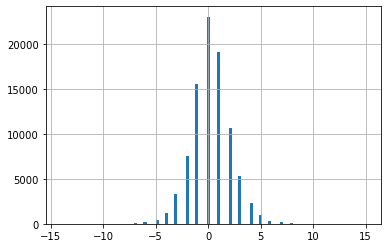

In [125]:
df.score_dif.hist(bins=100)

In [126]:
y = df.score_dif
X = df.drop(columns=['target', 'score_dif'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = False)

,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,...,home_interval_match_6,away_interval_match_6,home_interval_match_7,away_interval_match_7,home_interval_match_8,away_interval_match_8,home_interval_match_9,away_interval_match_9,home_interval_match_10,away_interval_match_10
0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,57.0,39.0,63.0,43.0,69.0,50.0,76.0,55.0,90.0,60.0
1,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,38.0,41.0,41.0,45.0,44.0,63.0,56.0,71.0,62.0,77.0
2,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,45.0,49.0,56.0,56.0,63.0,63.0,69.0,69.0,73.0,73.0
3,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,35.0,36.0,41.0,42.0,56.0,56.0,64.0,59.0,66.0,65.0
4,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,38.0,38.0,41.0,41.0,55.0,56.0,59.0,59.0,63.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,151.0,143.0,155.0,147.0,158.0,152.0,161.0,154.0,166.0,157.0
110934,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,57.0,120.0,64.0,122.0,120.0,124.0,122.0,127.0,124.0,129.0
110935,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,51.0,51.0,55.0,55.0,61.0,62.0,135.0,142.0,139.0,145.0
110936,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,75.0,75.0,78.0,79.0,83.0,84.0,101.0,96.0,106.0,102.0


In [128]:
from sklearn.neural_network import MLPRegressor


In [129]:
t1 = time.time()
mlpr_tan = MLPRegressor(
            hidden_layer_sizes=(100,),
            activation='tanh',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpr_tan.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

19.03251624107361


In [132]:
test_acc_mlpr_tan = mlpr_tan.score(X_test, y_test)
test_acc_mlpr_tan

0.14582685058872602

In [133]:
pre = mlpr_tan.predict(X_test)

In [135]:
res = pd.DataFrame([pre, y_test], index=['prediction', 'actual']).T

In [136]:
res

,prediction,actual
0,1.263125,1.0
1,0.508955,2.0
2,0.914709,-2.0
3,-0.362830,0.0
4,1.264918,-1.0
...,...,...
18047,0.564623,0.0
18048,1.263698,-3.0
18049,-0.170915,0.0
18050,0.062162,-4.0


## Std

In [141]:
import statistics

In [142]:
df

,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,home_interval_match_6,away_interval_match_6,home_interval_match_7,away_interval_match_7,home_interval_match_8,away_interval_match_8,home_interval_match_9,away_interval_match_9,home_interval_match_10,away_interval_match_10
0,away,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,57.0,39.0,63.0,43.0,69.0,50.0,76.0,55.0,90.0,60.0
1,home,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,38.0,41.0,41.0,45.0,44.0,63.0,56.0,71.0,62.0,77.0
2,draw,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,45.0,49.0,56.0,56.0,63.0,63.0,69.0,69.0,73.0,73.0
3,away,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,35.0,36.0,41.0,42.0,56.0,56.0,64.0,59.0,66.0,65.0
4,home,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,38.0,38.0,41.0,41.0,55.0,56.0,59.0,59.0,63.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,draw,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,151.0,143.0,155.0,147.0,158.0,152.0,161.0,154.0,166.0,157.0
110934,away,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,57.0,120.0,64.0,122.0,120.0,124.0,122.0,127.0,124.0,129.0
110935,draw,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,51.0,51.0,55.0,55.0,61.0,62.0,135.0,142.0,139.0,145.0
110936,away,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,75.0,75.0,78.0,79.0,83.0,84.0,101.0,96.0,106.0,102.0


In [143]:
df.home_team_history_goal_1

0         0.0
1         0.0
2         3.0
3         3.0
4         1.0
         ... 
110933    4.0
110934    1.0
110935    1.0
110936    1.0
110937    1.0
Name: home_team_history_goal_1, Length: 90258, dtype: float64

In [144]:
home_lis = [x for x in df.columns if x.startswith('home_team_history_goal_')]
home_op_lis = [x for x in df.columns if x.startswith('home_team_history_opponent_goal_')]
away_lis = [x for x in df.columns if x.startswith('away_team_history_goal_')]
away_op_lis = [x for x in df.columns if x.startswith('away_team_history_opponent_goal_')]

In [149]:
df[home_lis].values[0]

array([0., 2., 0., 0., 3., 0., 1., 2., 1., 4.])

In [152]:
df['home_std'] = list(map(statistics.stdev, df[home_lis].values))

In [153]:
df['home_op_std'] = list(map(statistics.stdev, df[home_op_lis].values))
df['away_std'] = list(map(statistics.stdev, df[away_lis].values))
df['away_op_std'] = list(map(statistics.stdev, df[away_op_lis].values))

In [154]:
y = df.target
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = False)

In [178]:
t1 = time.time()
mlpc_log = MLPClassifier(
            hidden_layer_sizes=(100,),
            activation='logistic',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpc_log.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

21.01598811149597


In [179]:
test_acc_mlp_log = mlpc_log.score(X_test, y_test)
test_acc_mlp_log

0.48941945490804345

In [165]:
mlpc_log.coefs_[0][1]

array([ 2.01571726e-02,  7.63103785e-03,  2.76520319e-03, -4.47322654e-03,
        1.24506379e-01,  8.28023011e-03, -1.49406307e-03, -2.29822503e-01,
        5.19961472e-05,  1.09048971e-02,  4.75214892e-01, -2.82155309e-05,
        4.54926059e-05,  6.74660367e-06,  1.71329677e-01,  2.09522042e-01,
        5.14915556e-06, -2.24455208e-02,  4.87951151e-02,  3.92235938e-06,
        9.07769249e-04,  4.40007242e-06,  4.56772258e-02, -1.25037670e-01,
       -8.69793859e-03, -2.01578930e-01, -3.85698639e-04, -1.04683664e-02,
       -1.26518753e-01,  9.03367192e-03, -3.19684668e-06, -1.83067730e-02,
       -1.19942796e-02, -3.87422951e-05, -7.65451085e-03,  6.20833472e-04,
       -2.43695325e-02, -4.58713577e-04,  1.58302768e-01, -2.95899082e-02,
       -2.21521856e-02, -2.99809548e-01, -4.47334681e-01,  1.54349395e-02,
        5.19294262e-02, -9.65702291e-03,  2.19679323e-02,  5.18628734e-02,
       -2.58860782e-07,  3.20021347e-01,  2.71363284e-03,  4.42064872e-02,
        9.88504843e-05, -

In [160]:
mlpc_log.coefs_[1].shape

(100, 3)

## Interval

In [198]:
for i in range(1, 11):
    df['home_interval_div_'+str(i)] = (df['home_team_history_goal_'+str(i)]+1)/(df['home_interval_match_'+str(i)]+1)
    df['away_interval_div_'+str(i)] = (df['away_team_history_goal_'+str(i)]+1)/(df['away_interval_match_'+str(i)]+1)
    

In [199]:
df

,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,home_interval_div_6,away_interval_div_6,home_interval_div_7,away_interval_div_7,home_interval_div_8,away_interval_div_8,home_interval_div_9,away_interval_div_9,home_interval_div_10,away_interval_div_10
0,away,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.017241,0.025000,0.031250,0.090909,0.042857,0.058824,0.025974,0.053571,0.054945,0.049180
1,home,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.076923,0.047619,0.023810,0.021739,0.066667,0.015625,0.035088,0.013889,0.015873,0.064103
2,draw,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.065217,0.080000,0.087719,0.087719,0.062500,0.046875,0.028571,0.071429,0.027027,0.013514
3,away,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.111111,0.081081,0.071429,0.093023,0.035088,0.052632,0.030769,0.033333,0.029851,0.045455
4,home,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.102564,0.102564,0.095238,0.023810,0.035714,0.052632,0.033333,0.083333,0.031250,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,draw,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.032895,0.020833,0.025641,0.013514,0.012579,0.013072,0.012346,0.019355,0.017964,0.018987
110934,away,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.034483,0.016529,0.030769,0.008130,0.033058,0.016000,0.016260,0.023438,0.016000,0.023077
110935,draw,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.019231,0.076923,0.035714,0.035714,0.048387,0.047619,0.007353,0.020979,0.014286,0.006849
110936,away,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.026316,0.013158,0.012658,0.025000,0.023810,0.023529,0.019608,0.030928,0.028037,0.009709


In [200]:
from sklearn.model_selection import train_test_split
y = df.target
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = False)

In [201]:
t1 = time.time()
mlpc = MLPClassifier(
    hidden_layer_sizes=(100,),
    alpha=1e-4,
    max_iter=1000,
    solver="adam",
    random_state=777,
    learning_rate_init=0.001,
)
mlpc.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

91.44167065620422


In [202]:
test_acc_mlp_1 = mlpc.score(X_test, y_test)
test_acc_mlp_1

0.4894748504320851

In [203]:
t1 = time.time()
mlpc_log = MLPClassifier(
            hidden_layer_sizes=(100,),
            activation='logistic',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpc_log.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

17.78711462020874


In [204]:
test_acc_mlp_log = mlpc_log.score(X_test, y_test)
test_acc_mlp_log

0.4911921116773765

In [205]:
t1 = time.time()
mlpc_tan = MLPClassifier(
            hidden_layer_sizes=(100,),
            activation='tanh',
            alpha=1e-4,
            max_iter=1000,
            solver="adam",
            random_state=777,
            learning_rate_init=0.001,
            )
mlpc_tan.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

17.77240490913391


In [206]:
test_acc_mlp_tan = mlpc_tan.score(X_test, y_test)
test_acc_mlp_tan

0.4865942831819189

In [238]:
avg = list(map(np.mean, mlpc_log.coefs_[0]))

In [239]:
avg = np.array(avg)

In [247]:
max_lix = avg.argsort()[::-1]

In [246]:
np.array(sorted(avg, reverse=True))*161

array([ 4.91721634e+00,  4.54014520e+00,  3.98151116e+00,  3.61973632e+00,
        3.43626412e+00,  3.18395086e+00,  3.11882571e+00,  3.11420797e+00,
        3.10652141e+00,  3.05631290e+00,  2.80220090e+00,  2.79459134e+00,
        2.59296047e+00,  2.55462999e+00,  2.47132122e+00,  2.37177622e+00,
        2.28939109e+00,  2.26639809e+00,  2.19968681e+00,  2.19430781e+00,
        2.14999378e+00,  2.04599051e+00,  1.98558881e+00,  1.94930676e+00,
        1.92976144e+00,  1.89150930e+00,  1.85547510e+00,  1.81658183e+00,
        1.61963602e+00,  1.59522139e+00,  1.52358540e+00,  1.48039592e+00,
        1.41437735e+00,  1.40054957e+00,  1.39291402e+00,  1.36370482e+00,
        1.34998284e+00,  1.29163589e+00,  1.28652095e+00,  1.27587755e+00,
        1.26093769e+00,  1.20466867e+00,  1.17361101e+00,  1.09050708e+00,
        1.04255984e+00,  1.00794233e+00,  9.74878754e-01,  9.60447827e-01,
        9.55946885e-01,  8.93952656e-01,  8.79422247e-01,  8.63813679e-01,
        8.46627300e-01,  

In [258]:
[df.columns[i] for i in max_lix[:46]]

['away_team_history_is_cup_1',
 'home_team_history_goal_1',
 'home_team_history_goal_2',
 'away_team_history_opponent_goal_2',
 'home_team_history_is_cup_1',
 'away_team_history_opponent_goal_3',
 'away_team_history_opponent_goal_6',
 'away_team_history_opponent_rating_2',
 'away_team_history_opponent_goal_4',
 'away_team_history_opponent_rating_8',
 'home_team_history_goal_7',
 'home_team_history_goal_4',
 'home_team_history_goal_5',
 'away_team_history_opponent_rating_9',
 'home_team_history_goal_8',
 'home_team_history_rating_1',
 'home_team_history_rating_3',
 'away_team_history_opponent_rating_7',
 'home_team_history_goal_6',
 'away_team_history_opponent_rating_6',
 'home_team_history_opponent_rating_10',
 'away_team_history_opponent_goal_8',
 'away_team_history_opponent_rating_5',
 'away_team_history_rating_10',
 'away_team_history_opponent_goal_5',
 'away_team_history_opponent_rating_3',
 'home_team_history_goal_10',
 'away_team_history_is_play_home_3',
 'home_team_history_ratin

In [259]:
[df.columns[i] for i in max_lix[-48:]]

['away_interval_div_5',
 'home_team_history_opponent_rating_8',
 'away_interval_div_8',
 'home_team_history_opponent_rating_5',
 'away_interval_match_2',
 'home_interval_div_9',
 'target',
 'away_team_history_goal_4',
 'home_team_history_opponent_goal_3',
 'home_team_history_is_play_home_10',
 'away_team_history_goal_3',
 'home_team_history_opponent_rating_4',
 'home_team_history_opponent_rating_1',
 'away_team_history_is_cup_10',
 'away_interval_div_9',
 'away_team_history_is_play_home_6',
 'home_interval_div_10',
 'away_team_history_is_play_home_7',
 'away_interval_div_3',
 'home_team_history_is_cup_2',
 'home_team_history_is_play_home_3',
 'home_team_history_opponent_goal_4',
 'home_team_history_is_play_home_1',
 'away_team_history_opponent_goal_10',
 'away_team_history_goal_7',
 'home_interval_match_5',
 'away_interval_match_3',
 'home_interval_match_1',
 'home_interval_div_8',
 'home_interval_div_4',
 'home_interval_div_7',
 'away_team_history_goal_1',
 'away_interval_div_6',
 'aw

In [262]:
pd.read_csv('data/test.csv')

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,5/1/2021 0:15,Division 1,755,False,9605704.0,30866250.0,4/28/2021 0:30,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,5/1/2021 0:30,Liga MX,743,False,10319425.0,460370.0,4/24/2021 2:06,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,5/1/2021 1:00,Paulista A2,1314,False,440905.0,220998.0,4/28/2021 23:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,5/1/2021 1:00,Paulista A2,1314,False,21036670.0,1553238.0,4/29/2021 1:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,5/1/2021 1:00,Paulista A2,1314,False,3618158.0,37400444.0,4/29/2021 1:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,team home,team away,11/30/2021 22:00,Segunda Division,776,False,185004.0,37604899.0,11/24/2021 20:15,...,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0
72707,18164889,team home,team away,11/30/2021 22:15,Superliga,636,False,212417.0,37600717.0,11/25/2021 0:30,...,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0
72708,18449018,team home,team away,11/30/2021 22:30,Friendly International Women,1363,False,37429080.0,37428117.0,10/23/2021 21:00,...,1363.0,1363.0,1126.0,1126.0,1126.0,1126.0,1126.0,1126.0,1363.0,1363.0
72709,17958831,team home,team away,11/30/2021 23:00,Serie A,648,False,459064.0,526182.0,11/27/2021 20:00,...,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0
